#Modelo de Regresión (Modelo Supervisado)

###**Context**:

It is a well known fact that Millenials LOVE Avocado Toast. It's also a well known fact that all Millenials live in their parents basements.

Clearly, they aren't buying home because they are buying too much Avocado Toast!

But maybe there's hope… if a Millenial could find a city with cheap avocados, they could live out the Millenial American Dream.

###**Content**:

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website:

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

###**Some relevant columns in the dataset:**

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

Source: *https://www.kaggle.com/datasets/neuromusic/avocado-prices?resource=download*

In [2]:
#Todos los imports:
import kagglehub
import os

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

In [3]:
#Descargamos la base de datos
path = kagglehub.dataset_download("neuromusic/avocado-prices")

print("Path to dataset files:", path)

print("Files in dataset:", os.listdir(path))


Path to dataset files: /kaggle/input/avocado-prices
Files in dataset: ['avocado.csv']


In [4]:
#Importamos la base de datos
file_path = os.path.join(path, "avocado.csv")
avocados = pd.read_csv(file_path)

# Enseñar las primeras filas
avocados.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
#La columna "Unnamed" no es necesaria, la quitamos
avocados.drop(columns=["Unnamed: 0"], inplace=True)

avocados.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
#Vemos cuantas filas tiene

num_rows = avocados.shape[0]
print(f"Número de filas: {num_rows}")

Número de filas: 18249


In [7]:
#No hay valores null, no nos tenemos que preocupar yay!
print(avocados.isnull().sum())

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


In [8]:
# Verificamos los tipos de datos de cada columna
print("Tipos de datos de las columnas:")
print(avocados.dtypes)

Tipos de datos de las columnas:
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object


## Implentación Algoritmo sin preprocesamiento de datos

In [ ]:
#Vale hemos analizado y transformado la dataset, asi que vamos a transformarla para aplicar modelos de regresión!

#Primero vamos a quitar la columna que vamos a predecir y asignarlo a otra variable
X = avocados.drop(columns=["AveragePrice"])  # X tiene las características de los avocados
y = avocados["AveragePrice"]  # El objetivo

In [ ]:
#Separamos las variables que son objetos y las numericas

numerical_cols = X.select_dtypes(include=["float64", "int64"]).columns
categorical_cols = X.select_dtypes(include=["object"]).columns

In [ ]:
#Normalizamos los valores de las variables entre 0 y 1
scaler = MinMaxScaler()
X_numerical = scaler.fit_transform(X[numerical_cols])
print(X_numerical)

[[1.02634162e-03 4.55837802e-05 2.66015275e-03 ... 1.63050227e-05
  0.00000000e+00 0.00000000e+00]
 [8.76600710e-04 2.96470005e-05 2.18063319e-03 ... 1.70463985e-05
  0.00000000e+00 0.00000000e+00]
 [1.89000237e-03 3.49416730e-05 5.33202818e-03 ... 1.80343168e-05
  0.00000000e+00 0.00000000e+00]
 ...
 [2.18895720e-04 5.24067937e-05 1.19820293e-04 ... 7.39802156e-06
  0.00000000e+00 1.00000000e+00]
 [2.57907608e-04 6.71674191e-05 1.45625628e-04 ... 8.74263951e-06
  0.00000000e+00 1.00000000e+00]
 [2.78455540e-04 1.27278353e-04 1.15098392e-04 ... 4.54792107e-06
  0.00000000e+00 1.00000000e+00]]


In [ ]:
# One-Hot Encoding categorical columns, aqui lo que hacemos en resumen es crear columnas nuevas, es 1 si es de la region de Atlanta por ejmeplo 0, sino
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_categorical = encoder.fit_transform(X[categorical_cols])

categorical_col_names = encoder.get_feature_names_out(categorical_cols)
X_categorical_df = pd.DataFrame(X_categorical, columns=categorical_col_names)
print(X_categorical_df)

       Date_2015-01-11  Date_2015-01-18  Date_2015-01-25  Date_2015-02-01  \
0                  0.0              0.0              0.0              0.0   
1                  0.0              0.0              0.0              0.0   
2                  0.0              0.0              0.0              0.0   
3                  0.0              0.0              0.0              0.0   
4                  0.0              0.0              0.0              0.0   
...                ...              ...              ...              ...   
18244              0.0              0.0              0.0              0.0   
18245              0.0              0.0              0.0              0.0   
18246              0.0              0.0              0.0              0.0   
18247              0.0              0.0              0.0              0.0   
18248              0.0              0.0              0.0              0.0   

       Date_2015-02-08  Date_2015-02-15  Date_2015-02-22  Date_2015-03-01  

In [ ]:
# Combinamos los datos numéricos y los objetos, ya tenemos nuestro data preparado
X_processed = pd.concat([pd.DataFrame(X_numerical, columns=numerical_cols), X_categorical_df], axis=1)
print(X_processed)

       Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0          0.001026  0.000046  0.002660  0.000019    0.000449    0.000643   
1          0.000877  0.000030  0.002181  0.000023    0.000491    0.000703   
2          0.001890  0.000035  0.005332  0.000051    0.000420    0.000601   
3          0.001262  0.000050  0.003516  0.000029    0.000300    0.000424   
4          0.000815  0.000041  0.002142  0.000030    0.000319    0.000447   
...             ...       ...       ...       ...         ...         ...   
18244      0.000272  0.000090  0.000075  0.000000    0.000697    0.000976   
18245      0.000221  0.000052  0.000168  0.000000    0.000478    0.000668   
18246      0.000219  0.000052  0.000120  0.000286    0.000485    0.000699   
18247      0.000258  0.000067  0.000146  0.000286    0.000566    0.000816   
18248      0.000278  0.000127  0.000115  0.000088    0.000620    0.000896   

       Large Bags  XLarge Bags  year  Date_2015-01-11  ...  \
0        0.00

In [ ]:
#Vamos a partir nuestro dataset en 80/20 con 80 para entrenar el modelo y 20 para testearlo

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizamos las predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluamos el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostramos los resultados
print("MAE:", mae)
print("MSE:", mse)
print("R-squared:", r2)


MAE: 0.16768085080934433
MSE: 0.050411891607230745
R-squared: 0.6862377592112736


MAE (Error Absoluto Medio): 0.20: Esto significa que, en promedio, la predicción de tu modelo está desviándose en 0.20 unidades del valor real. Es un buen punto de partida, pero todavía puede mejorarse.

MSE (Error Cuadrático Medio): 0.07: Este valor penaliza más los errores grandes que el MAE. Cuanto más bajo sea, mejor es el rendimiento del modelo. Aún podría optimizarse.

R² (Coeficiente de Determinación): 0.55: Este valor muestra que tu modelo explica aproximadamente el 55% de la variabilidad en los precios del aguacate. Un valor de R² de 1 sería perfecto (explicaría toda la variabilidad), por lo que 0.55 indica que hay margen de mejora.

Primeras filas de las predicciones:
       Real  Predicción
8604   0.82    0.915530
2608   0.97    1.058010
14581  1.44    1.489516
4254   0.97    0.905317
16588  1.45    1.444041


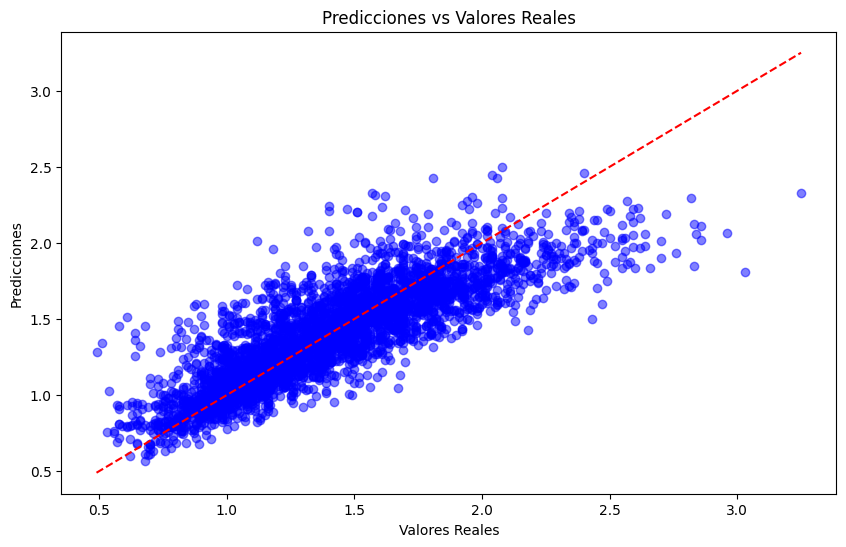

In [ ]:
# Creamos un DataFrame con los valores reales y las predicciones
results = pd.DataFrame({
    'Real': y_test,
    'Predicción': y_pred
})

# Mostrar las primeras filas de los resultados
print("Primeras filas de las predicciones:")
print(results.head())

# Graficar las predicciones vs los valores reales
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()

Gráfico de dispersión donde los puntos representan las predicciones frente a los valores reales. La línea roja representa una línea ideal donde las predicciones coinciden exactamente con los valores reales. Si las predicciones se alinean bien con esta línea, el modelo está funcionando correctamente.

## Implementación de Algoritmo con preprocesamiento de datos

In [9]:
#Vamos a ver que valores únicos tiene type y region

print("Tipos:", avocados['type'].unique())

print("Regiones:", avocados['region'].unique())

#Tipos son dos valores, y las regiones parece que son regiones de EEUU

Tipos: ['conventional' 'organic']
Regiones: ['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


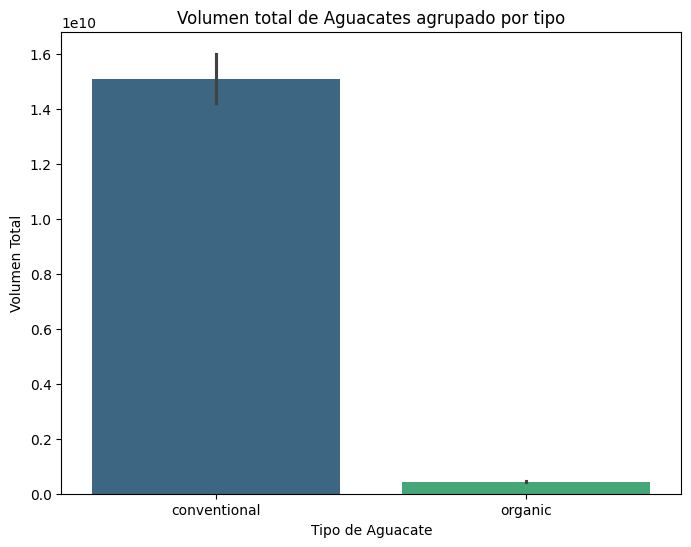

In [10]:
#Vamos a ver como esta distribuidos por volumen los tipos de aguacate
plt.figure(figsize=(8, 6))
sns.barplot(data=avocados, x='type', y='Total Volume', estimator='sum', hue='type', palette='viridis')
plt.title("Volumen total de Aguacates agrupado por tipo")
plt.xlabel("Tipo de Aguacate")
plt.ylabel("Volumen Total")
plt.show()


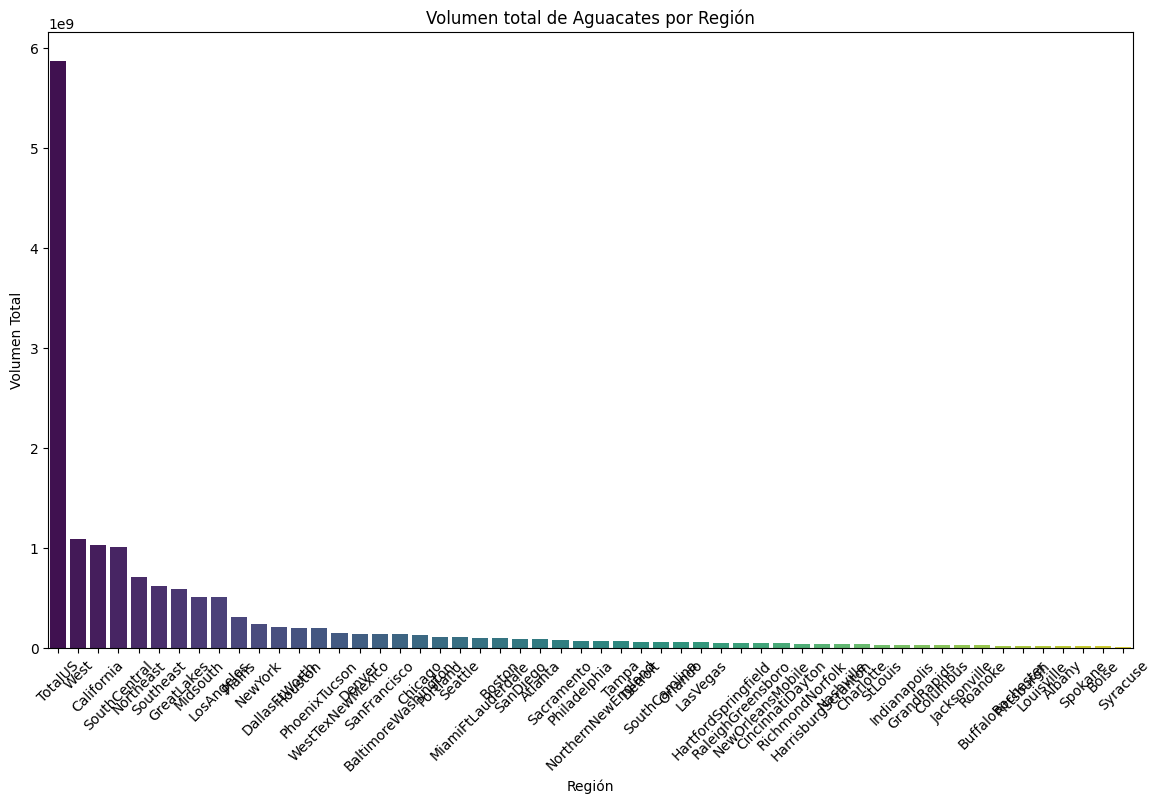

In [11]:
plt.figure(figsize=(14, 8))
top_regions = avocados.groupby('region')['Total Volume'].sum().sort_values(ascending=False)
sns.barplot(x=top_regions.index, y=top_regions.values, hue=top_regions.index, palette='viridis')
plt.xticks(rotation=45)
plt.title("Volumen total de Aguacates por Región")
plt.xlabel("Región")
plt.ylabel("Volumen Total")
plt.show()

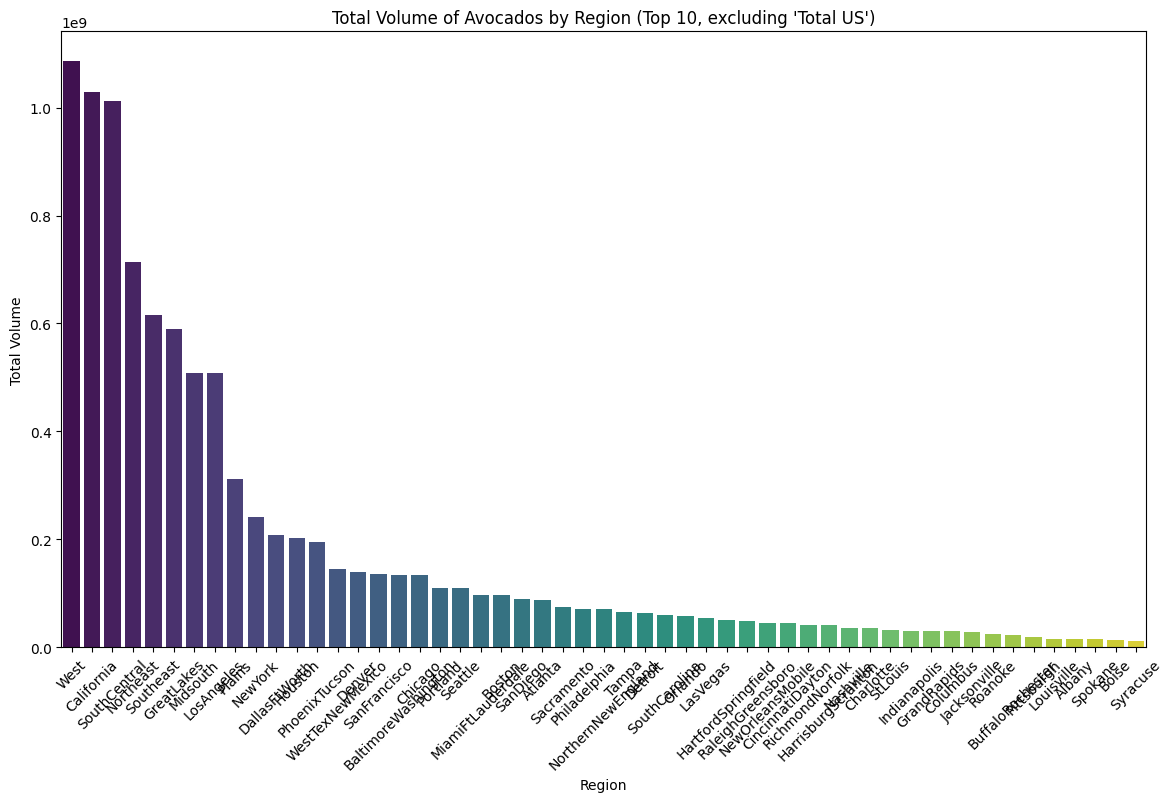

In [12]:
#Vemos que TotalUS es la que más tiene, vamos a quitarla pq esto no es una región, es todo EEUU

top_regions = avocados[avocados['region'] != 'TotalUS'].groupby('region')['Total Volume'].sum().sort_values(ascending=False)

# Plot the total volume by region (sin 'Total US')
plt.figure(figsize=(14, 8))
sns.barplot(x=top_regions.index, y=top_regions.values, hue=top_regions.index, palette='viridis')
plt.xticks(rotation=45)
plt.title("Total Volume of Avocados by Region (Top 10, excluding 'Total US')")
plt.xlabel("Region")
plt.ylabel("Total Volume")
plt.show()


In [13]:
# Vemos la distribución de las variables numéricas
avocados.describe()

#No veo nada a primera vista raro :)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [14]:
#Vale entonces para date, nos vamos a quedar con el dia y el mes, el año ya lo tenemos

#Pasamos de objeto a fecha
avocados['Date'] = pd.to_datetime(avocados['Date'])

# Extraemos mes
avocados['month'] = avocados['Date'].dt.month

# Quitamos date del dataset
avocados = avocados.drop(columns=['Date'])

#comprobamos
avocados.head()


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


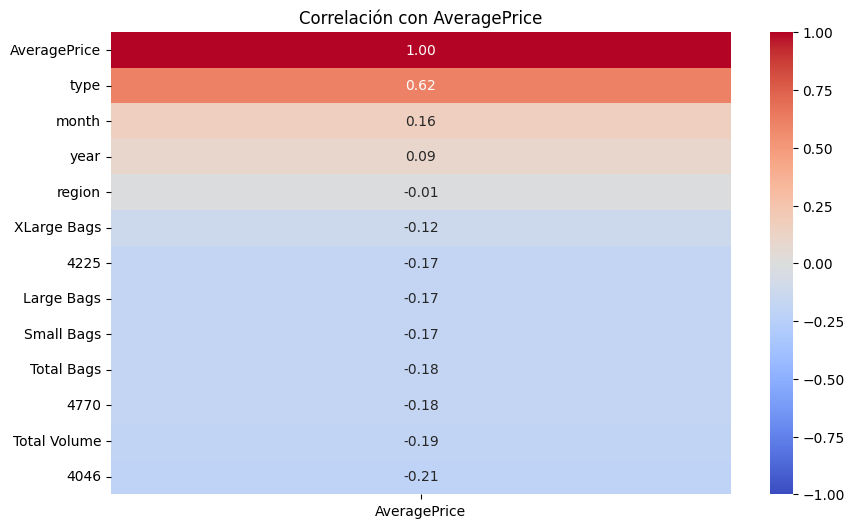

In [15]:
# Convertimos variables categóricas a numéricas
avocados_encoded = avocados.copy()
avocados_encoded['type'] = avocados_encoded['type'].astype('category').cat.codes
avocados_encoded['region'] = avocados_encoded['region'].astype('category').cat.codes

# Calculamos la matriz de correlación
corr = avocados_encoded.corr()

# Mostramos solo las correlaciones con AveragePrice
plt.figure(figsize=(10, 6))
sns.heatmap(corr[["AveragePrice"]].sort_values(by="AveragePrice", ascending=False),
            annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlación con AveragePrice")
plt.show()

El análisis de correlación mostró pocas relaciones lineales fuertes entre las variables y el precio promedio (AveragePrice). PCA, al enfocarse en varianza lineal, podría eliminar información clave como la variable type, que tiene una fuerte correlación positiva (0.62). (Al final hice el análisis PCA, pero empeora el modelo, así que no estará incluido en la memoria)

Además, no utilizaremos un modelo lineal sino que utilizaremos Random Forest ya que es más adecuado para capturar relaciones no lineales y manejar características categóricas sin pérdida de información.

In [16]:
#Primero vamos a quitar la columna que vamos a predecir y asignarlo a otra variable
X = avocados.drop(columns=["AveragePrice"])  # X tiene las características de los avocados
y = avocados["AveragePrice"]  # El objetivo

In [17]:
#Separamos las variables que son objetos y las numericas

numerical_cols = X.select_dtypes(include=["float64", "int64"]).columns
categorical_cols = X.select_dtypes(include=["object"]).columns

In [18]:
#Normalizamos los valores de las variables entre 0 y 1
scaler = StandardScaler()
X_numerical = scaler.fit_transform(X[numerical_cols])
print(X_numerical)

[[-0.22771641 -0.23081597 -0.1999022  ... -0.22235202 -0.17557961
  -1.22128204]
 [-0.23042664 -0.23110251 -0.20805446 ... -0.22233464 -0.17557961
  -1.22128204]
 [-0.21208462 -0.23100731 -0.1544779  ... -0.22231148 -0.17557961
  -1.22128204]
 ...
 [-0.24233073 -0.2306933  -0.24309014 ... -0.22256082 -0.17557961
   1.97050371]
 [-0.24162464 -0.2304279  -0.24265143 ... -0.2225293  -0.17557961
   1.97050371]
 [-0.24125273 -0.22934712 -0.24317042 ... -0.22262764 -0.17557961
   1.97050371]]


In [19]:
# One-Hot Encoding categorical columns, aqui lo que hacemos en resumen es crear columnas nuevas, es 1 si es de la region de Atlanta por ejmeplo 0, sino
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_categorical = encoder.fit_transform(X[categorical_cols])

categorical_col_names = encoder.get_feature_names_out(categorical_cols)
X_categorical_df = pd.DataFrame(X_categorical, columns=categorical_col_names)
print(X_categorical_df)

       type_organic  region_Atlanta  region_BaltimoreWashington  region_Boise  \
0               0.0             0.0                         0.0           0.0   
1               0.0             0.0                         0.0           0.0   
2               0.0             0.0                         0.0           0.0   
3               0.0             0.0                         0.0           0.0   
4               0.0             0.0                         0.0           0.0   
...             ...             ...                         ...           ...   
18244           1.0             0.0                         0.0           0.0   
18245           1.0             0.0                         0.0           0.0   
18246           1.0             0.0                         0.0           0.0   
18247           1.0             0.0                         0.0           0.0   
18248           1.0             0.0                         0.0           0.0   

       region_Boston  regio

In [20]:
# Combinamos los datos numéricos y los objetos, ya tenemos nuestro data preparado
X_processed = pd.concat([pd.DataFrame(X_numerical, columns=numerical_cols), X_categorical_df], axis=1)
print(X_processed)

       Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.227716 -0.230816 -0.199902 -0.212091   -0.234170   -0.232647   
1         -0.230427 -0.231103 -0.208054 -0.211997   -0.233350   -0.231568   
2         -0.212085 -0.231007 -0.154478 -0.211325   -0.234730   -0.233399   
3         -0.223444 -0.230741 -0.185350 -0.211864   -0.237096   -0.236568   
4         -0.231538 -0.230891 -0.208719 -0.211834   -0.236718   -0.236154   
...             ...       ...       ...       ...         ...         ...   
18244     -0.241373 -0.230017 -0.243857 -0.212540   -0.229301   -0.226665   
18245     -0.242296 -0.230693 -0.242277 -0.212540   -0.233594   -0.232196   
18246     -0.242331 -0.230693 -0.243090 -0.205766   -0.233463   -0.231644   
18247     -0.241625 -0.230428 -0.242651 -0.205774   -0.231866   -0.229543   
18248     -0.241253 -0.229347 -0.243170 -0.210450   -0.230807   -0.228111   

       Large Bags  XLarge Bags      year  type_organic  ...  \
0       -0.2

MAE: 0.10695487671232876
MSE: 0.023141625597260265
R-squared: 0.855967152364331


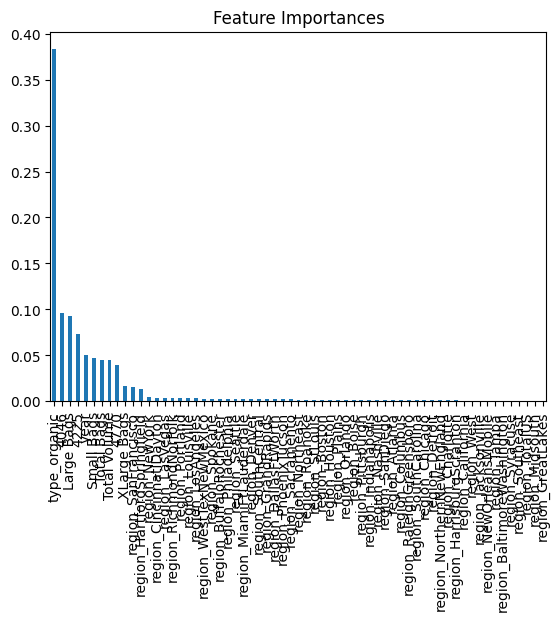

In [24]:
#Dividimos los datos 80% para entrenar el modelo y 20% para testearlo
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Entrenamos al modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Hacemos predicciones
y_pred = rf_model.predict(X_test)

# Evaluamos el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R-squared:", r2)

Primeras filas de las predicciones:
       Real  Predicción
8604   0.82      1.0302
2608   0.97      0.9849
14581  1.44      1.3998
4254   0.97      0.9174
16588  1.45      1.4634


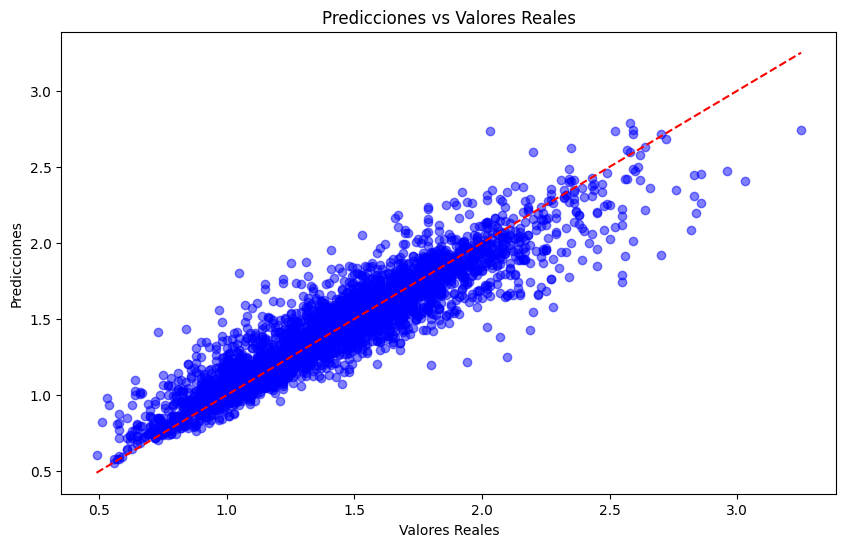

In [22]:
# Creamos un DataFrame con los valores reales y las predicciones
results = pd.DataFrame({
    'Real': y_test,
    'Predicción': y_pred
})

# Mostrar las primeras filas de los resultados
print("Primeras filas de las predicciones:")
print(results.head())

# Graficar las predicciones vs los valores reales
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()


Con ayuda de ChatGPT: https://chatgpt.com/share/67e02eb3-9084-800c-8e28-e5d4b969bcd1

## Fracaso con PCA, es que no es lineal

In [ ]:
#Usamos StandardScaler para todo el dataset
scaler_combined = StandardScaler()
X_scaled = scaler_combined.fit_transform(X_processed)

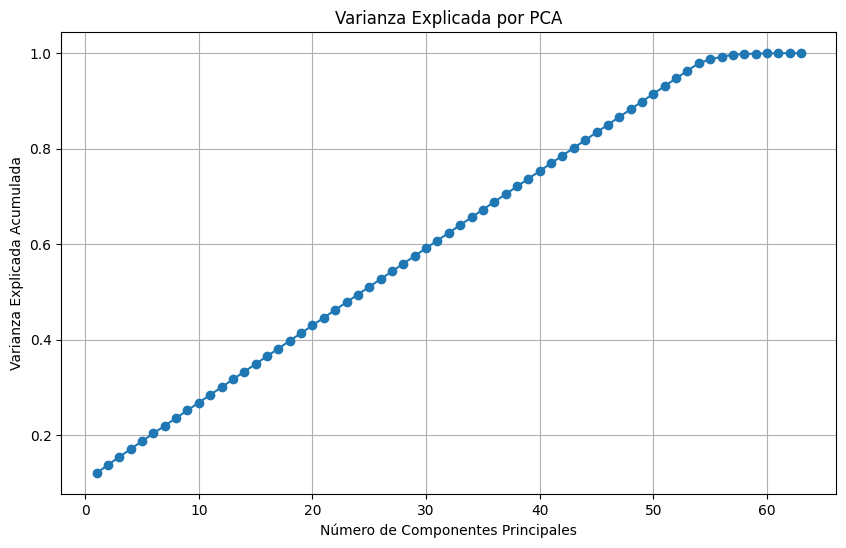

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por PCA')
plt.grid(True)

In [ ]:
desired_variance = 0.8
pca_reduced = PCA(n_components=desired_variance)
X_pca_reduced = pca_reduced.fit_transform(X_scaled)
print(f"Number of components explaining {desired_variance * 100}% variance: {pca_reduced.n_components_}")

Number of components explaining 80.0% variance: 43


Según el gráfico, parece que:

- Con 5 componentes explicas más del 90% de la varianza.

- Con 6 o 7 ya llegas al 95-97%.

In [ ]:
# Aplicamos PCA con 5 componentes
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

print(f"Forma de X después del PCA: {X_pca.shape}")

Forma de X después del PCA: (18249, 5)


In [ ]:
print(X_pca_reduced)

[[-5.20332950e-01 -3.27444007e-01  4.23320039e-01 ...  5.65693012e-14
  -4.74682855e-15 -3.69547902e-14]
 [-5.23523342e-01 -3.26959516e-01  4.22191375e-01 ...  5.65137900e-14
  -4.76070634e-15 -3.69547902e-14]
 [-4.99230821e-01 -3.30124064e-01  4.29663118e-01 ...  5.68191014e-14
  -4.66356183e-15 -3.69686680e-14]
 ...
 [-7.19170653e-01  8.58899291e-01 -9.30451597e-01 ...  1.96562946e-12
  -2.19161670e-13 -2.03775067e-12]
 [-7.17348092e-01  8.59011841e-01 -9.30337460e-01 ...  1.96562946e-12
  -2.19161670e-13 -2.03775067e-12]
 [-7.17652699e-01  8.59948453e-01 -9.30267539e-01 ...  1.96562946e-12
  -2.19161670e-13 -2.03775067e-12]]


In [ ]:
# Dividimos los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=0.2, random_state=42)

In [ ]:
# Creamos el modelo
model = LinearRegression()

# Entrenamos el modelo
model.fit(X_train, y_train)

# Hacemos predicciones
y_pred = model.predict(X_test)

In [ ]:
# Evaluamos el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostramos resultados
print("MAE:", mae)
print("MSE:", mse)
print("R-squared:", r2)

MAE: 0.2949684470219774
MSE: 0.1312939887144151
R-squared: 0.18282978900922875


Primeras filas de las predicciones:
       Real  Predicción
8604   0.82    1.266786
2608   0.97    1.390126
14581  1.44    1.422588
4254   0.97    1.339254
16588  1.45    1.397410


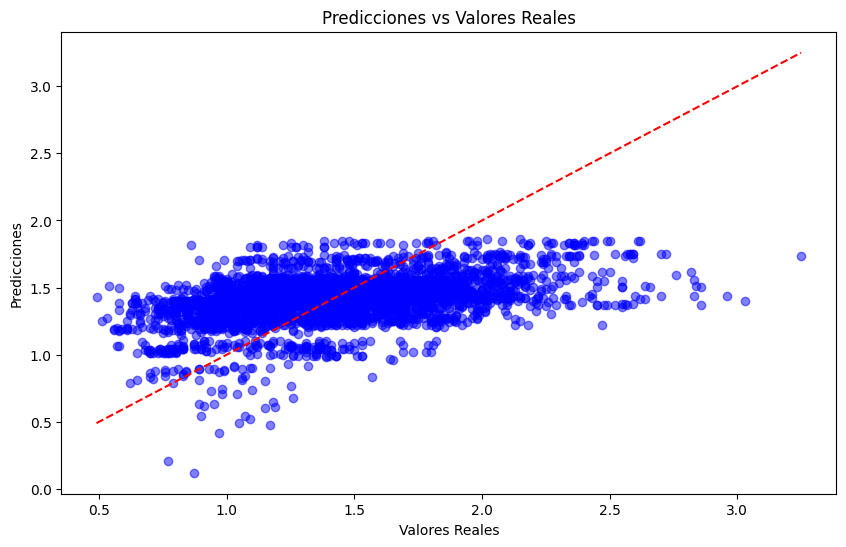

In [ ]:
# Creamos un DataFrame con los valores reales y las predicciones
results = pd.DataFrame({
    'Real': y_test,
    'Predicción': y_pred
})

# Mostrar las primeras filas de los resultados
print("Primeras filas de las predicciones:")
print(results.head())

# Graficar las predicciones vs los valores reales
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()